In [1]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

In [3]:
# importing the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [4]:
df = pd.read_csv("../Dataset/model_building/train/news_headlines_train.csv")

In [5]:
# Testing the tokenizer

text = ["this is a test of the bert model", "thank you for the meeting today"]

sent_id = tokenizer.batch_encode_plus(text, padding=True, max_length = 8)


print(sent_id)


{'input_ids': [[101, 2023, 2003, 1037, 3231, 1997, 1996, 14324, 2944, 102], [101, 4067, 2017, 2005, 1996, 3116, 2651, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]}


In [88]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['sentiment'], 
                                                                    random_state=42, 
                                                                    test_size=0.3, 
                                                                    stratify=df['sentiment'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=42, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

# Tokenize Sentences

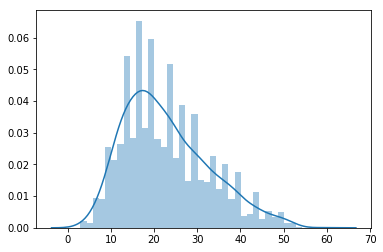

In [7]:
sent_length = [len(x.split()) for x in train_text]

sns.distplot(sent_length, bins = 40)

In [8]:
MAX_LENGTH = 40

In [32]:
# tokens_train = tokenizer.batch_encode_plus(train_text.tolist(), max_length = MAX_LENGTH, 
#                                           pad_to_max_length = True, truncation = True)

# tokens_val = tokenizer.batch_encode_plus(val_text.tolist(), max_length = MAX_LENGTH, 
#                                           pad_to_max_length = True, truncation = True)

# tokens_test = tokenizer.batch_encode_plus(test_text.tolist(), max_length = MAX_LENGTH, 
#                                           pad_to_max_length = True, truncation = True)

In [16]:
# bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',

    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
    'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
   'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [17]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'.
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 50.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 100.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 150.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 200.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 250.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 300.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 350.00MB
INFO:absl:Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3: 400.00MB
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3, Total size: 434.04MB
INFO:absl:Downloaded TF-Hub Modul

In [19]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.92169875 -0.39353448 -0.539317    0.68256223  0.43848467 -0.14021158
  0.87747115  0.26043344 -0.63112956 -0.9999658  -0.2632002   0.85105294]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.19451556  0.2514169   0.19075055 ... -0.24845096  0.38568532
   0.13290964]
 [-0.59478706 -0.39420387  0.25245696 ... -0.7694671   1.1564169
   0.32475767]
 [ 0.006415   -0.15766485  0.54610234 ... -0.17451018  0.6028966
   0.42672232]
 ...
 [ 0.21948308 -0.20927124  0.5386829  ...  0.24693576  0.18250978
  -0.44427094]
 [ 0.0108023  -0.4455315   0.35990974 ...  0.3172279   0.23562793
  -0.63070583]
 [ 0.29321173 -0.10581844  0.61147577 ...  0.20745769  0.1449466
  -0.3535333 ]]


# Defining the Model

In [61]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, trainable=False, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(768, activation="relu", name='fc1')(net)
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(512, activation="relu", name = 'fc2')(net)
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(3, activation="softmax", name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [26]:
# def build_classifier_model():
#     text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
#     preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
#     encoder_inputs = preprocessing_layer(text_input)
#     encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
#     outputs = encoder(encoder_inputs)
#     net = outputs['pooled_output']
#     net = tf.keras.layers.Dropout(0.1)(net)
#     net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
#     return tf.keras.Model(text_input, net)

In [62]:
model = build_classifier_model()

In [50]:
model(tf.constant(text_test))
bert_raw_result = model(tf.constant(text_test))

In [53]:
print(bert_raw_result)

tf.Tensor([[0.19858319 0.4181397  0.38327706]], shape=(1, 3), dtype=float32)


In [52]:
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.5494833  0.603038   0.59466326]], shape=(1, 3), dtype=float32)


In [ ]:
tf.keras.utils.plot_model(classifier_model)

# Model Training

In [30]:
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.metrics.CategoricalAccuracy()

In [ ]:
#tf.data.experimental.make_csv_dataset()

In [ ]:
#tf.data.TextLineDataset()

In [89]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['sentiment'], 
                                                                    random_state=42, 
                                                                    test_size=0.3, 
                                                                    stratify=df['sentiment'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=42, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [90]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=3)

In [93]:
c1 = 0
c2 = 0
c3 = 0
for x in train_labels:
    if x[0] == 1:
        c1+= 1
    elif x[1] == 1:
        c2 += 1
    else:
        c3 += 1
        
print(f"Class 1: {c1}\nClass 2: {c2}\nClass 3: {c3}")

Class 1: 1328
Class 2: 636
Class 3: 271


In [85]:
# train_ds = tf.data.Dataset.from_tensor_slices(train_text.tolist())
# train_Y = tf.data.Dataset.from_tensor_slices(train_labels.tolist())

# val_ds = tf.data.Dataset.from_tensor_slices(val_text.tolist())
# val_Y = tf.data.Dataset.from_tensor_slices(val_labels.tolist())

# test_ds = tf.data.Dataset.from_tensor_slices(test_text.tolist())
# test_Y = tf.data.Dataset.from_tensor_slices(test_labels.tolist())




# train_ds = tf.data.Dataset.from_tensor_slices((train_text.tolist(), train_labels.tolist()))
# # # train_Y = tf.data.Dataset.from_tensor_slices(train_labels.tolist())

# val_ds = tf.data.Dataset.from_tensor_slices((val_text.tolist(), val_labels.tolist()))
# # # val_Y = tf.data.Dataset.from_tensor_slices(val_labels.tolist())

# test_ds = tf.data.Dataset.from_tensor_slices((test_text.tolist(), test_labels.tolist()))
# # # test_Y = tf.data.Dataset.from_tensor_slices(test_labels.tolist())

In [80]:
# for feat, targ in train_ds.take(5):
#     print ('Features: {}, Target: {}'.format(feat, targ))

Features: b'` For Nordea , moving into the new headquarters signifies the beginning of a new era .', Target: [0. 1.]
Features: b"Cramo Group 's financial targets for 2010-2013 are sales growth higher than 10 percent per year ; return on equity above 15 percent .", Target: [0. 1.]
Features: b'LEED is an internationally recognized green building certification system , developed by the U.S. Green Building Council .', Target: [1. 0.]
Features: b'Both operating profit and net sales for the six-month period increased , respectively , from EUR13 .8 m and EUR143 .6 m , as compared to the corresponding period in 2007 .', Target: [0. 1.]
Features: b'Seventy-three of those also have more extensive training in products built on the latest ArchestrA technologies , such as the Wonderware System Platform .', Target: [1. 0.]


In [82]:
epochs = 2
steps_per_epoch = tf.data.experimental.cardinality(train_data).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

INFO:absl:using Adamw optimizer
INFO:absl:gradient_clip_norm=1.000000


In [95]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics = metrics)

In [96]:
history = model.fit(x=train_text, y=train_labels, 
                    validation_data=(val_text, val_labels), 
                    epochs=epochs, batch_size=32)

Epoch 1/2
70/70 [==============================] - 825s 12s/step - loss: 0.9913 - categorical_accuracy: 0.5620 - val_loss: 0.8866 - val_categorical_accuracy: 0.5992
Epoch 2/2
70/70 [==============================] - 810s 12s/step - loss: 0.8460 - categorical_accuracy: 0.6094 - val_loss: 0.7973 - val_categorical_accuracy: 0.6472


# Evaluation of Model

In [98]:
loss, acc = model.evaluate(test_text, test_labels)

15/15 [==============================] - 173s 12s/step - loss: 0.7804 - categorical_accuracy: 0.6555


In [99]:
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

Loss: 0.780393123626709
Accuracy: 0.6555323600769043


# Export Model

In [101]:
# Save the weights
version_name = 'v1'
saved_model_path = './bert_{}'.format(version_name)
model.save_weights(f'./checkpoints/{saved_model_path}')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


ResourceExhaustedError: checkpoints/bert_v1_temp/part-00000-of-00001.data-00000-of-00001.tempstate7332029077314867094; No space left on device [Op:SaveV2]

In [100]:
version_name = 'v1'
saved_model_path = './bert_{}'.format(version_name)

model.save(saved_model_path, include_optimizer=True)

ResourceExhaustedError: bert_v1/variables/variables_temp/part-00000-of-00001.data-00000-of-00001.tempstate2276669771186326027; No space left on device [Op:SaveV2]

# Loading Model

In [ ]:
version_to_load = 'v1'
toLoad_model_path = './bert_{}'.format(version_to_load)

In [ ]:
reloaded_model = tf.saved_model.load(toLoad_model_path)

In [10]:
# dataset = "../Dataset"

# dataset_dir = os.path.join(dataset, "model_building" )

# train_dir = os.path.join(dataset_dir, "train")

# name = "news_headlines_train.csv"

# df = pd.read_csv(os.path.join(train_dir, name))

# remove unused folders to make it easier to load the data
# remove_dir = os.path.join(train_dir, 'unsup')
# shutil.rmtree(remove_dir)

In [33]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['sentiment'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['sentiment'])


# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
#                                                                 random_state=2018, 
#                                                                 test_size=0.5, 
#                                                                 stratify=temp_labels)

In [34]:
df.head()

,text,sentiment
0,"In addition , a further 29 employees can be la...",-1
1,The authorisation is in force until the end of...,0
2,The value of the deal was not disclosed .,0
3,You need to be ready when the window opens up ...,0
4,Major Order in India Comptel Corporation has r...,1


In [12]:
# AUTOTUNE = tf.data.AUTOTUNE
# batch_size = 32
# seed = 42

# raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
#     '../Dataset/model_building/train',
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset='training',
#     seed=seed)

# class_names = raw_train_ds.class_names
# train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

# val_ds = tf.keras.preprocessing.text_dataset_from_directory(
#     '../Dataset/model_building/train',
#     batch_size=batch_size,
#     validation_split=0.2,
#     subset='validation',
#     seed=seed)

# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [13]:
# test_ds = tf.keras.preprocessing.text_dataset_from_directory(
#     'aclImdb/test',
#     batch_size=batch_size)

# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {

    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
   'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [16]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [28]:
df.iloc[0, 0]

'In addition , a further 29 employees can be laid off until further notice and the whole workforce can be laid off for short periods if needed .'

In [24]:
text_test = df.iloc[0:10, 0].to_numpy()

In [26]:
text_preprocessed = bert_preprocess_model(text_test)

In [27]:
print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (10, 128)
Word Ids   : [ 101 1999 2804 1010 1037 2582 2756 5126 2064 2022 4201 2125]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)